# Importing the libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-churn-for-bank-customers/Churn_Modelling.csv


# Loading the Dataset

In [2]:
bank_data=pd.read_csv("/kaggle/input/predicting-churn-for-bank-customers/Churn_Modelling.csv")

In [3]:
bank_data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

# Entire EDA at a single go by using Pandas-Profiling 

In [4]:
pip install pandas-profiling

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
bank_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
from pandas_profiling import ProfileReport
report=ProfileReport(bank_data,title="profile report")

In [7]:
report.to_widgets()

In [8]:
report.to_file("report.html")

In [9]:
pip install sweetviz

     |████████████████████████████████| 325 kB 8.0 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
import sweetviz

In [11]:
my_report = sweetviz.analyze([bank_data, "data"],target_feat='Exited')

:FEATURES DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [12]:
my_report.show_html('my_report.html')

Report my_report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


We note the following.
* No Missing values. 
* Number of variables is 14.
* Number of observations is 10000
* Numerical variables are 7, categorical variables are 4, and boolean variables are 3.
* Number of missing values is zero for all variables.


We also note the following.
* Row number is not required for our analysis.
* Customer Id is not required
* Surname has high cardinality and i will remove it from the analysis part.
* Credit score has minimal left skewed and almost normally distributed
* Geography has 3 categories. Germany,Spain, France. so we need to encode this 
* Gender is categorical and has two categories and we need to encode this.
* Age is slightly right skewed.
* Tenure has zeros but no ned of any opeartion there.
* Balance has zeros but no need of any operation there.
* Number of products is categorical.
* Has credit card is boolean which will explain whether the customer has credit card or not.
* Is Active member is boolean and it says that the customer is an active member or not.
* Estimated Salary is having its importance in the analysis.
* Exited is boolean which is our target variable and we have whether the customer is exited or not.

* No Strong correlation can be seen on either sides.

In [13]:
genderwise=bank_data.groupby('Gender')['Exited'].sum()
genderwise

Gender
Female    1139
Male       898
Name: Exited, dtype: int64

In [14]:
y=genderwise.tolist()
label=['Female','Male']

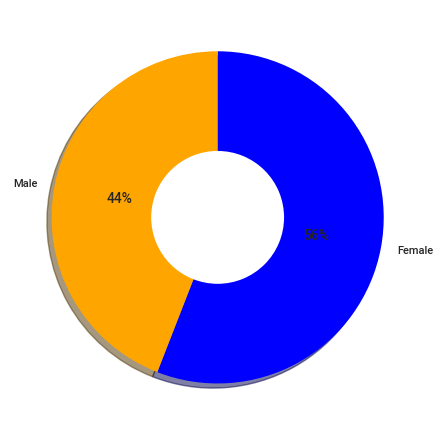

In [15]:
plt.pie(y, labels=label,shadow=True,
   counterclock=False, startangle=90,autopct='%1.f%%',
       colors=['blue','orange'])
plt.pie([1],colors=['white'],radius=.4)
plt.show()

* Female is churning more.

In [16]:
geographywise=bank_data.groupby('Geography')['Exited'].sum()
geographywise

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64

In [17]:
y=geographywise.tolist()
label=['France','Germany','Spain']

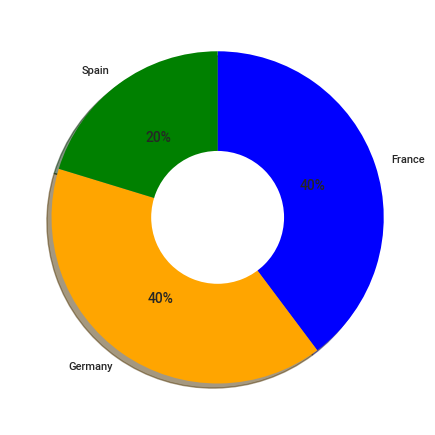

In [18]:
plt.pie(y, labels=label,shadow=True,
   counterclock=False, startangle=90,autopct='%1.f%%',
       colors=['blue','orange','green'])
plt.pie([1],colors=['white'],radius=.4)
plt.show()

* Germany the most churned.

In [19]:
nofproductswise=bank_data.groupby('NumOfProducts')['Exited'].sum()
nofproductswise

NumOfProducts
1    1409
2     348
3     220
4      60
Name: Exited, dtype: int64

In [20]:
y=nofproductswise.tolist()
label=['1','2','3','4']

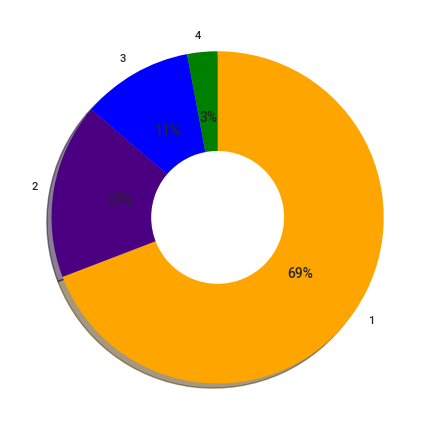

In [21]:
plt.pie(y, labels=label,shadow=True,
   counterclock=False, startangle=90,autopct='%1.f%%',
       colors=['orange','indigo','blue','green'])
plt.pie([1],colors=['white'],radius=.4)
plt.show()

* customer using only one product are the most churned

In [22]:
hascreditwise=bank_data.groupby('HasCrCard')['Exited'].sum()
hascreditwise

HasCrCard
0     613
1    1424
Name: Exited, dtype: int64

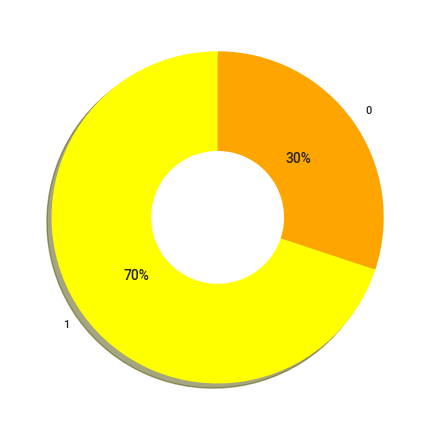

In [23]:
plt.pie(hascreditwise.tolist(), labels=['0','1'],shadow=True,
   counterclock=False, startangle=90,autopct='%1.f%%',
       colors=['orange','yellow'])
plt.pie([1],colors=['white'],radius=.4)
plt.show()

* The people who are having credit card churned more.

# We first review for categorical variables

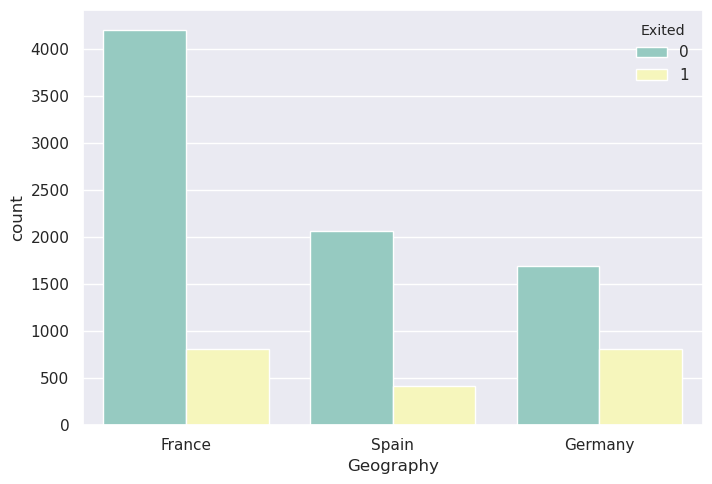

In [24]:
sns.set(style="darkgrid")
sns.countplot(x='Geography', hue = 'Exited',data = bank_data, palette="Set3")

* Majority of the data is from persons from France. 
* The proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem in the areas where it has fewer clients.

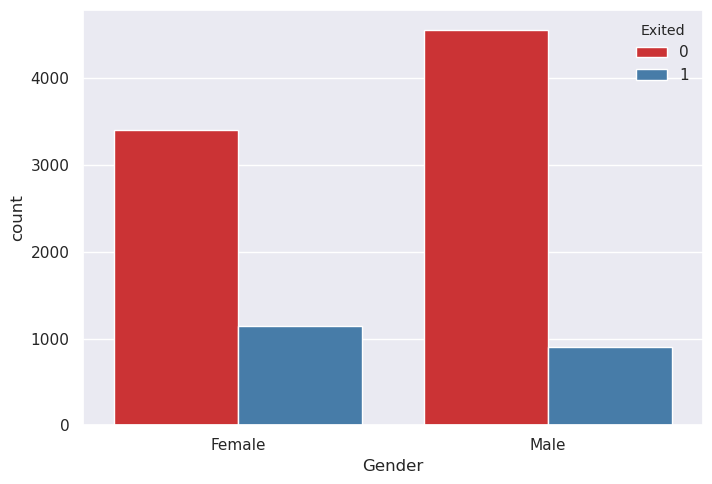

In [25]:
sns.set(style="darkgrid")
sns.countplot(x='Gender', hue = 'Exited',data = bank_data, palette="Set1")

* The proportion of female customers churning is also greater than that of male customers

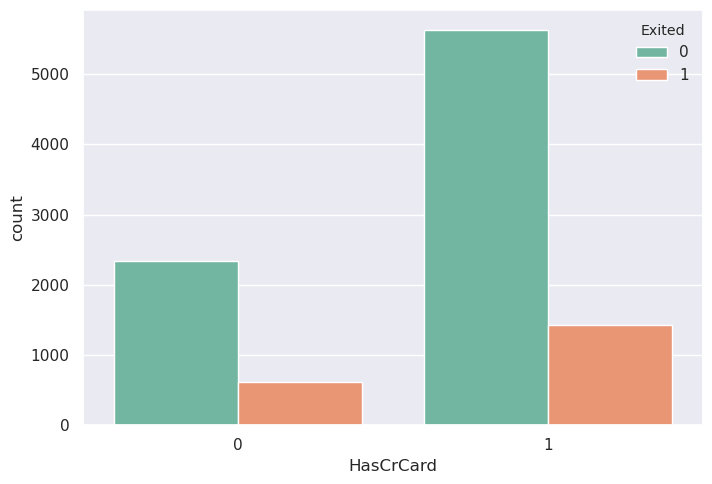

In [26]:
sns.set(style="darkgrid")
sns.countplot(x='HasCrCard', hue = 'Exited',data = bank_data, palette="Set2")

* Majority of the customers that churned are those with credit cards.

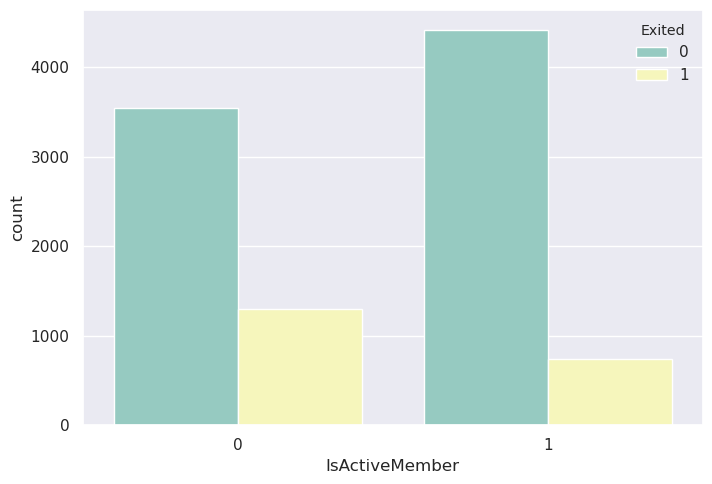

In [27]:
sns.set(style="darkgrid")
sns.countplot(x='IsActiveMember', hue = 'Exited',data = bank_data, palette="Set3")

* Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

# Relations based on the continuous data attributes

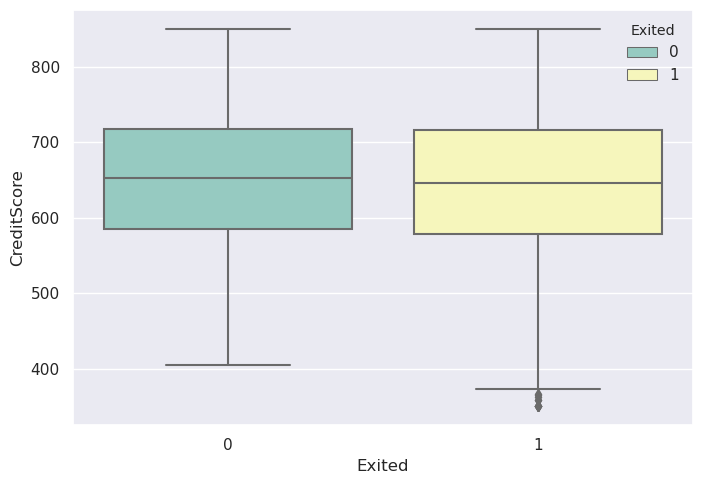

In [28]:
sns.set(style="darkgrid")
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = bank_data,palette="Set3",dodge=False)

* There is not much difference in the credit score distribution between retained and churned customers.

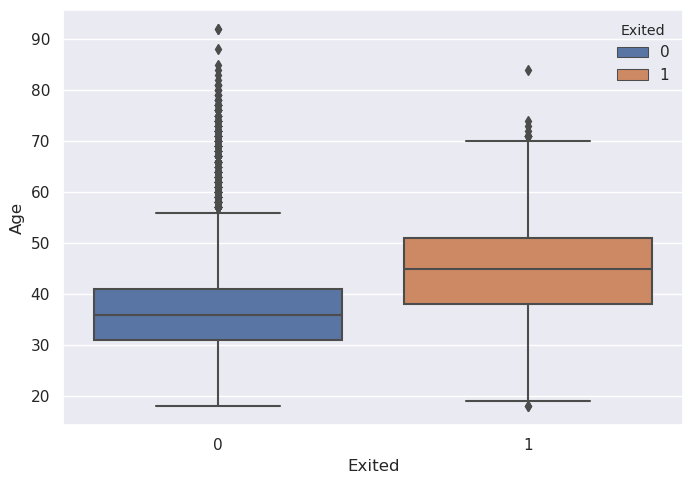

In [29]:
sns.set(style="darkgrid")
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = bank_data,dodge=False)

* The older customers are churning at more than the younger ones hinting to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups

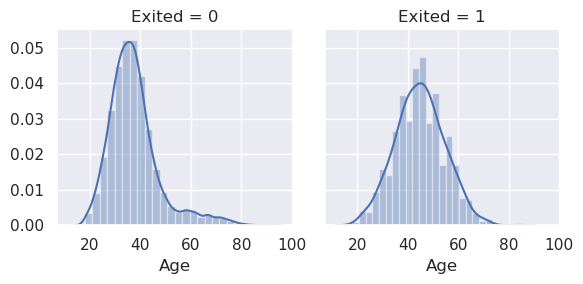

In [30]:
g = sns.FacetGrid(bank_data, col = "Exited")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

* It seems younger customers tend to stick with the company more compared to older customers.

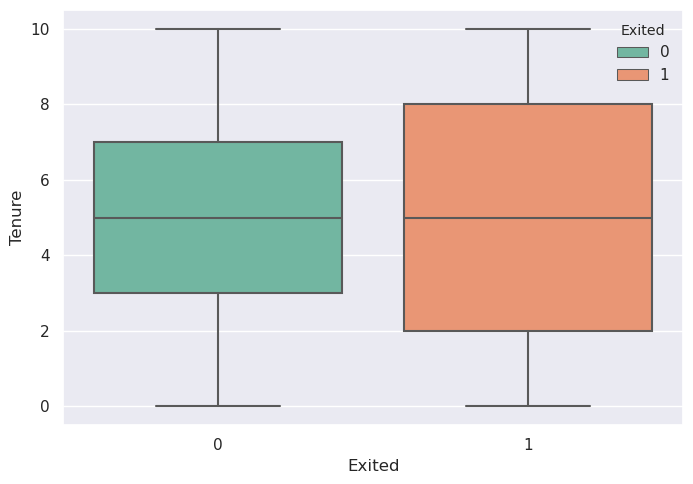

In [31]:
sns.set(style="darkgrid")
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = bank_data,palette="Set2",dodge=False)

* With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.

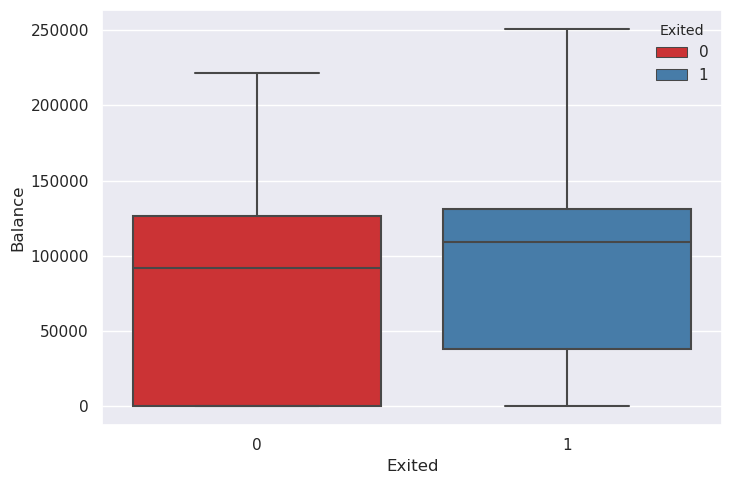

In [32]:
sns.set(style="darkgrid")
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = bank_data,palette="Set1",dodge=False)

* The bank is losing customers with significant bank balances which is likely to hit their available capital for lending.

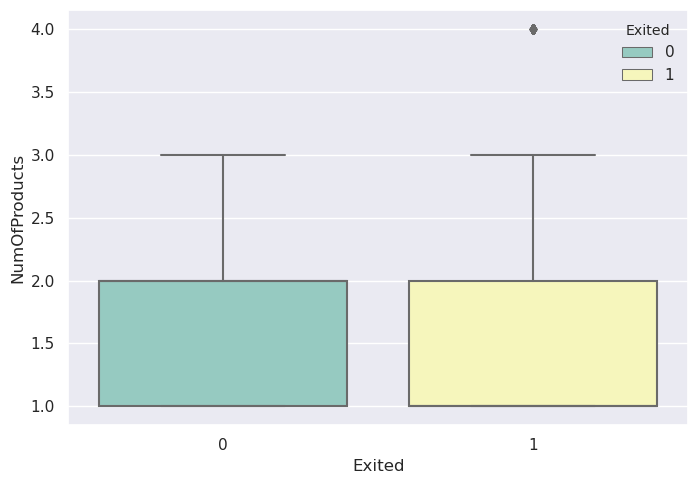

In [33]:
sns.set(style="darkgrid")
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = bank_data,palette="Set3",dodge=False)

* The number of product has no significant effect on the likelihood to churn.

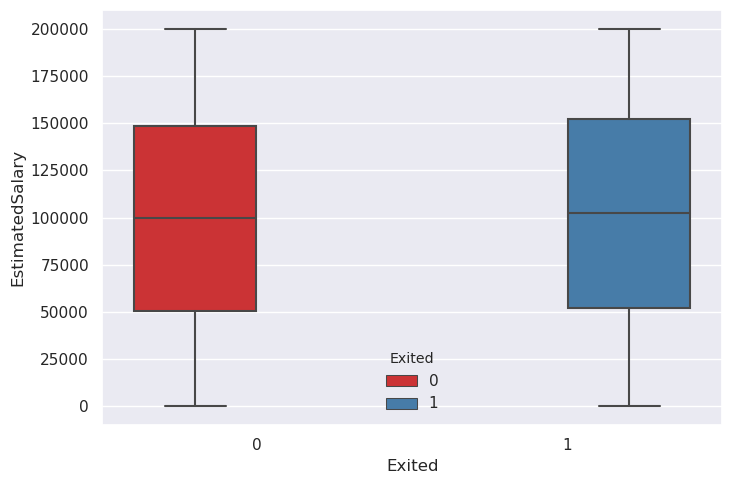

In [34]:
sns.set(style="darkgrid")
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = bank_data,palette="Set1")

* The salary has no significant effect on the likelihood to churn.

# Data Preprocessing

* Target variable count

In [35]:
target_count = bank_data.Exited.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

Class 0: 7963
Class 1: 2037


* Lets see the proportion of the imbalance of the classes.

Proportion: 3.91 : 1


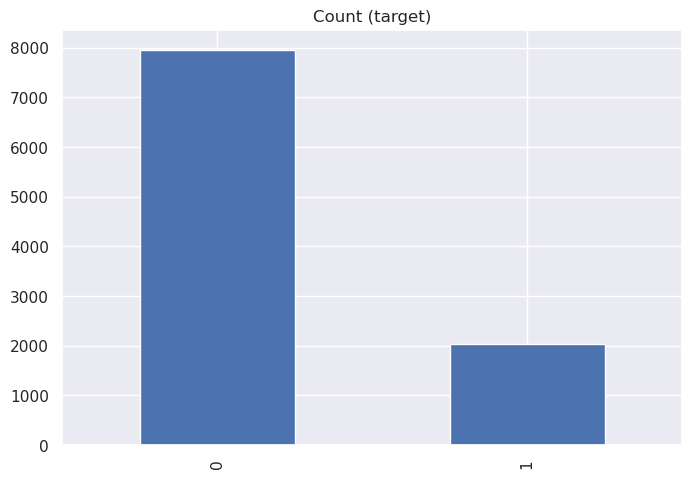

In [36]:
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [37]:
# Class count
count_class_0, count_class_1 = bank_data.Exited.value_counts()

# Divide by class
df_class_0 = bank_data[bank_data['Exited'] == 0]
df_class_1 = bank_data[bank_data['Exited'] == 1]

Random over-sampling:
1    7963
0    7963
Name: Exited, dtype: int64


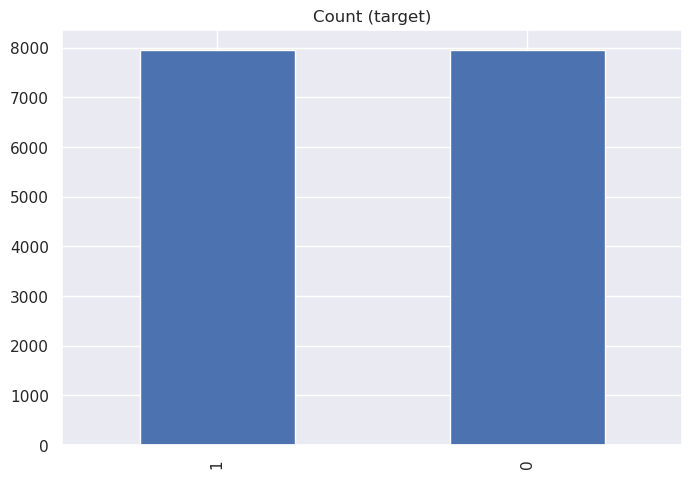

In [38]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
bank_data_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(bank_data_over.Exited.value_counts())

bank_data_over.Exited.value_counts().plot(kind='bar', title='Count (target)')

* Row number, Customer ID, Surname are not part of our analysis, So, I dont include them .

In [39]:
X=bank_data_over.iloc[:,3:13]
y=bank_data_over.iloc[:,13]

# Geography and gender features are categorical and we need to create dumies for them.

In [40]:
geography=pd.get_dummies(X['Geography'], drop_first= True)
gender=pd.get_dummies(X['Gender'], drop_first= True)

# Lets concatenate the data frames

In [41]:
X=pd.concat([X,geography,gender],axis=1)

* Dropping the unwanted columns now which are Geography and Gender

In [42]:
X=X.drop(['Geography','Gender'],axis=1)


# Lets split the data to train and test

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Lets do the feature scaling

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [45]:
X_train

array([[-0.7767048 ,  0.92467008,  1.0412497 , ...,  1.48819902,
        -0.5442099 ,  0.98751901],
       [ 1.22998839,  0.08227763,  0.01812289, ..., -0.67195314,
        -0.5442099 ,  0.98751901],
       [ 0.28807118,  0.6438726 , -1.00500392, ...,  1.48819902,
        -0.5442099 , -1.01263873],
       ...,
       [ 0.30854764, -0.85371398,  0.01812289, ..., -0.67195314,
        -0.5442099 , -1.01263873],
       [ 0.15497418, -0.47931734,  0.35916516, ...,  1.48819902,
        -0.5442099 , -1.01263873],
       [-0.2750315 , -0.10492069,  1.72333424, ..., -0.67195314,
        -0.5442099 ,  0.98751901]])

* Lets dive into Machine learning models

* Training my models.

We need to get the best algorithm which is giving us the best output as predictability. So, we need to try out with various ML algorithms and then we can select the best ones which wll give us the best performance. Then we can choose the baseline models and then we can proceed further by doing hyper parametr tuning to that baseline models to get the better accuracy.
#The algorithms we are implementing is as follows
1. Logistic Regression
2. Naive Bayes Model.
3. Decision tree
4. Random forest
5. XG Boost
6. Ada Boost
7. Gradient Boosting.

#So, we will be comparing the accuracies and ROC AUC scores and finalise the baseline models.


# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100,random_state=0)
lr.fit(X_train,y_train)
y_pred_logistic=lr.predict(X_test)
correct = (y_test == y_pred_logistic).sum()
incorrect = (y_test != y_pred_logistic).sum()
accuracy = correct / (correct + incorrect) * 100

print('\nPercent Accuracy: %0.1f' %accuracy)


Percent Accuracy: 71.4


In [47]:
prediction = pd.DataFrame()
prediction['actual'] = y_test
prediction['predicted'] = y_pred_logistic
prediction['correct'] = prediction['actual'] == prediction['predicted']

print ('\nDetailed results for first 20 tests:')
print (prediction.head(20))


Detailed results for first 20 tests:
      actual  predicted  correct
7717       0          0     True
8943       0          1    False
2097       0          0     True
907        1          1     True
3375       1          1     True
1336       0          0     True
7588       0          0     True
8547       0          1    False
6429       0          0     True
214        0          0     True
2943       0          1    False
1110       1          1     True
2669       0          0     True
1448       1          1     True
6304       0          0     True
5058       0          0     True
9567       0          0     True
9056       1          1     True
2436       0          0     True
4606       1          0    False


In [48]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
c_logistic=confusion_matrix(y_test,y_pred_logistic)
print(c_logistic)

#Accuracy of our model.
Accuracy_logistic=sum(np.diag(c_logistic))/(np.sum(c_logistic))
Accuracy_logistic

[[1161  444]
 [ 466 1115]]


0.714375392341494

In [49]:
#Evaluation 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1605
           1       0.72      0.71      0.71      1581

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186



In [50]:
# ROC_AUC 
from sklearn.metrics import roc_auc_score, roc_curve
logistic_roc_auc = roc_auc_score(y_test, y_pred_logistic , average = 'macro', sample_weight = None)
logistic_roc_auc

0.7143071639267706

# Naive Bayes Model

In [51]:
from sklearn.naive_bayes import GaussianNB
classifier_naive=GaussianNB()

# Fitting the model with training data
classifier_naive.fit(X_train, y_train)

# Predicting the Test set results
y_predict_naive=classifier_naive.predict(X_test)

In [52]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
c_naive=confusion_matrix(y_test,y_predict_naive)
print(c_naive)

#Accuracy of our model.
Accuracy_naive=sum(np.diag(c_naive))/(np.sum(c_naive))
Accuracy_naive

[[1165  440]
 [ 486 1095]]


0.709353421217828

In [53]:
#Evaluation 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_naive))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1605
           1       0.71      0.69      0.70      1581

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186



In [54]:
# ROC AUC
naive_roc_auc = roc_auc_score(y_test, y_predict_naive , average = 'macro')
naive_roc_auc

0.7092281591563366

# Decision Tree

In [55]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Fitting the model with training data
classifier_tree=classifier_tree.fit(X_train, y_train)

# Predicting the Test set results
y_predict_tree = classifier_tree.predict(X_test)

In [56]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
c_tree=confusion_matrix(y_test,y_predict_tree)
print(c_tree)

#Accuracy of our model.
Accuracy_tree=sum(np.diag(c_tree))/(np.sum(c_tree))
Accuracy_tree

[[1373  232]
 [  35 1546]]


0.916195856873823

In [57]:
#Evaluation 

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_tree))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      1605
           1       0.87      0.98      0.92      1581

    accuracy                           0.92      3186
   macro avg       0.92      0.92      0.92      3186
weighted avg       0.92      0.92      0.92      3186



In [58]:
# ROC AUC
tree_roc_auc = roc_auc_score(y_test, y_predict_tree , average = 'macro')
tree_roc_auc

0.9166569129913045

In [59]:
features_label = X.columns
importances = classifier_tree.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) CreditScore                    0.228039
 2) Age                            0.167528
 3) Tenure                         0.163665
 4) Balance                        0.138656
 5) NumOfProducts                  0.111136
 6) HasCrCard                      0.075214
 7) IsActiveMember                 0.040079
 8) EstimatedSalary                0.026292
 9) Germany                        0.021698
10) Spain                          0.015082
11) Male                           0.012612


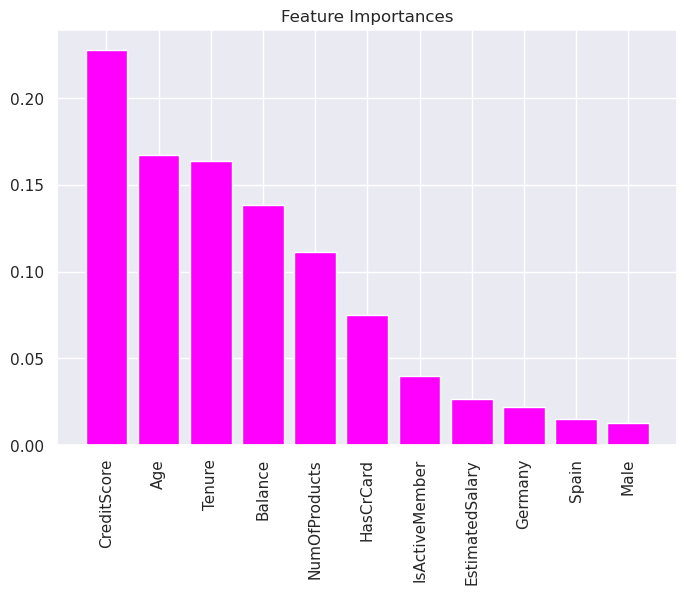

In [60]:
# Visualization of the Feature importances
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color = "magenta", align = "center")
plt.xticks(range(X.shape[1]), features_label, rotation = 90)
plt.show()

from sklearn import tree
from sklearn.tree import export_text
plt.figure(figsize=(60,50))
tree.plot_tree(classifier_tree,filled=True)

# Random forest

In [61]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_ensemble = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

# Fitting the model with training data
classifier_ensemble.fit(X_train, y_train)

# Predicting the Test set results
y_predict_ensemble = classifier_ensemble.predict(X_test)

In [62]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
c_ensemble=confusion_matrix(y_test,y_predict_ensemble)
print(c_ensemble)

#Accuracy of our model.
Accuracy_ensemble=sum(np.diag(c_ensemble))/(np.sum(c_ensemble))
Accuracy_ensemble

[[1467  138]
 [  48 1533]]


0.9416195856873822

In [63]:
#Evaluation 

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_ensemble))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1605
           1       0.92      0.97      0.94      1581

    accuracy                           0.94      3186
   macro avg       0.94      0.94      0.94      3186
weighted avg       0.94      0.94      0.94      3186



In [64]:
# ROC AUC
ensemble_roc_auc = roc_auc_score(y_test, y_predict_ensemble , average = 'macro')
ensemble_roc_auc

0.9418290801397435

In [65]:
features_label = X.columns
importances = classifier_ensemble.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) CreditScore                    0.233657
 2) Age                            0.157936
 3) Tenure                         0.149181
 4) Balance                        0.145461
 5) NumOfProducts                  0.110238
 6) HasCrCard                      0.089792
 7) IsActiveMember                 0.033825
 8) EstimatedSalary                0.028794
 9) Germany                        0.021015
10) Spain                          0.018307
11) Male                           0.011793


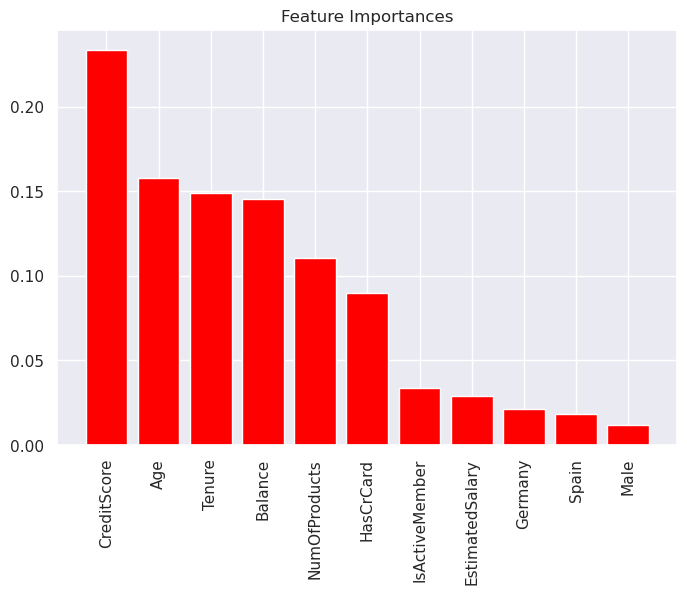

In [66]:
# Visualization of the Feature importances
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color = "red", align = "center")
plt.xticks(range(X.shape[1]), features_label, rotation = 90)
plt.show()

# XG Boost

In [67]:
!pip install xgboost

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [68]:
# Fitting the XGBoost to the training set
from xgboost import XGBClassifier
classifier_xg=XGBClassifier()

# Fitting the model with training data
classifier_xg.fit(X_train,y_train)

# Predicting the test results
y_predict_xg= classifier_xg.predict(X_test)

In [69]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
c_xg=confusion_matrix(y_test,y_predict_xg)
print(c_xg)

#Accuracy of our model.
Accuracy_xg=sum(np.diag(c_xg))/(np.sum(c_xg))
Accuracy_xg

[[1393  212]
 [ 101 1480]]


0.9017576898932831

In [70]:
#Evaluation 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_xg))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1605
           1       0.87      0.94      0.90      1581

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



In [71]:
#ROC AUC
xg_roc_auc = roc_auc_score(y_test, y_predict_xg , average = 'macro')
xg_roc_auc

0.9020145773111777

In [72]:
features_label = X.columns
importances = classifier_xg.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) CreditScore                    0.319444
 2) Age                            0.147543
 3) Tenure                         0.136286
 4) Balance                        0.089745
 5) NumOfProducts                  0.065828
 6) HasCrCard                      0.059961
 7) IsActiveMember                 0.042696
 8) EstimatedSalary                0.038619
 9) Germany                        0.037933
10) Spain                          0.036417
11) Male                           0.025529


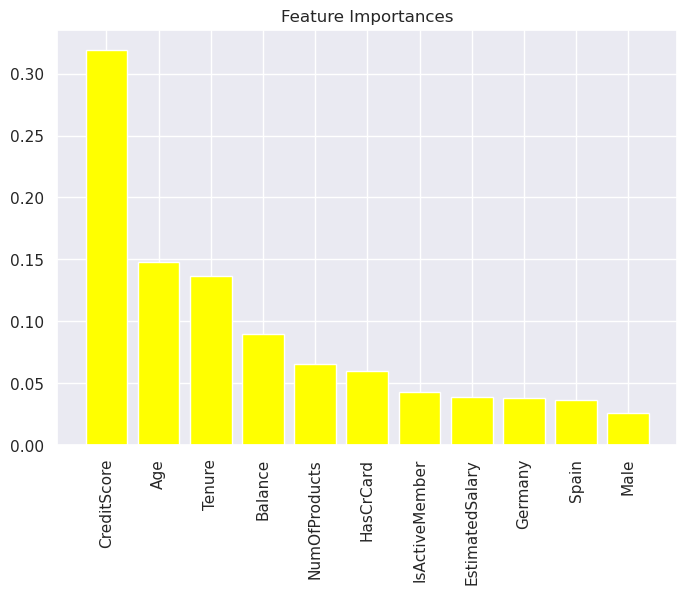

In [73]:
# Visualization of the Feature importances
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color = "yellow", align = "center")
plt.xticks(range(X.shape[1]), features_label, rotation = 90)
plt.show()

# Adaboost

In [74]:
from sklearn.ensemble import AdaBoostClassifier
classifier_ada = AdaBoostClassifier(base_estimator = None, n_estimators = 200, learning_rate = 1.0)

# Fitting the model with training data 
classifier_ada.fit(X_train, y_train)


# Predicting the test results
y_predict_ada= classifier_ada.predict(X_test)

In [75]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
c_ada=confusion_matrix(y_test,y_predict_ada)
print(c_ada)

#Accuracy of our model.
Accuracy_ada=sum(np.diag(c_ada))/(np.sum(c_ada))
Accuracy_ada

[[1290  315]
 [ 387 1194]]


0.7796610169491526

In [76]:
#Evaluation 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_ada))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1605
           1       0.79      0.76      0.77      1581

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



In [77]:
#ROC AUC
ada_roc_auc = roc_auc_score(y_test, y_predict_ada , average = 'macro')
ada_roc_auc

0.7794782670378975

# GradientBoosting

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_GB = GradientBoostingClassifier(loss = 'deviance', n_estimators = 200)

# Fitting the model with training data 
classifier_GB.fit(X_train, y_train)

# Predicting the test results
y_predict_GB= classifier_GB.predict(X_test)

In [79]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
c_GB=confusion_matrix(y_test,y_predict_GB)
print(c_GB)

#Accuracy of our model
Accuracy_GB=sum(np.diag(c_GB))/(np.sum(c_GB))
Accuracy_GB

[[1317  288]
 [ 312 1269]]


0.8116760828625236

In [80]:
#Evaluation 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_GB))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1605
           1       0.82      0.80      0.81      1581

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



In [81]:
# ROC AUC
GB_roc_auc = roc_auc_score(y_test, y_predict_GB , average = 'macro')
GB_roc_auc

0.8116086470765576

In [82]:
models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost', 'GradientBoosting']
accuracy = [Accuracy_logistic, Accuracy_naive, Accuracy_tree, Accuracy_ensemble, Accuracy_xg, Accuracy_ada, Accuracy_GB]
roc_auc = [logistic_roc_auc, naive_roc_auc, tree_roc_auc, ensemble_roc_auc, xg_roc_auc, ada_roc_auc, GB_roc_auc]

metrics = {'accuracy': accuracy, 'roc_auc': roc_auc}
table_metrics = pd.DataFrame(metrics, index = models)
table_metrics

accuracy   roc_auc
Logistic Regression  0.714375  0.714307
Naive Bayes          0.709353  0.709228
Decision Tree        0.916196  0.916657
Random Forest        0.941620  0.941829
XGBoost              0.901758  0.902015
AdaBoost             0.779661  0.779478
GradientBoosting     0.811676  0.811609

Lets us do the cross validation approach and then move on to hyper parametr tuning.

Now we will go for the best ones to go for hyper parameter tuning.

Implementing a cross-validation based approach

In [83]:
from sklearn.model_selection import cross_val_score

# Function that will track the mean value and the standard deviation of the metric

def cvDictGen(functions, score, X_train = X, y_train = y, cv = 5):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, scoring = score)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [84]:
model = [lr, classifier_naive, classifier_tree, classifier_ensemble, classifier_xg, classifier_ada, classifier_GB]
cvD = cvDictGen(model, score = 'roc_auc')
cvD

{'LogisticRegression': [0.7062586682164095, 0.005961606486949193],
 'GaussianNB': [0.7434473899377496, 0.00467085909256093],
 'DecisionTreeClassifier': [0.9163632821988159, 0.001310706184684603],
 'RandomForestClassifier': [0.9864690587537467, 0.0026429840790212905],
 'XGBClassifier': [0.9557056668738204, 0.0035222083251504905],
 'AdaBoostClassifier': [0.8617280520613477, 0.0030762188319767127],
 'GradientBoostingClassifier': [0.8963069059166425, 0.0033418129994042677]}


1. Decision Tree
2. Random forest
3. xgboost

Are performing well.

# Hyper parameter tuning

In [85]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Random forest

In [86]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
min_samples_split = [5, 10]
min_samples_leaf = [4, 6, 8, 10]
ccp_alpha= [0.001,0.005,0.010,0.015,0.020,0.025,0.030]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':["entropy", "gini"],
               'ccp_alpha' : ccp_alpha
               }

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['log2', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [4, 6, 8, 10], 'criterion': ['entropy', 'gini'], 'ccp_alpha': [0.001, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03]}


* Setting refit='AUC', refits an estimator on the whole dataset with the
* parameter setting that has the best cross-validated AUC score.

In [87]:
rf_random = RandomizedSearchCV(estimator = classifier_ensemble, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2,scoring='roc_auc',refit='AUC', random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_random.best_params_,rf_random.best_score_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 25.4min finished


({'n_estimators': 2000,
  'min_samples_split': 5,
  'min_samples_leaf': 6,
  'max_features': 'log2',
  'max_depth': 20,
  'criterion': 'entropy',
  'ccp_alpha': 0.001},
 0.915089973848339)

In [88]:
rf_random = RandomizedSearchCV(estimator = classifier_ensemble, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2,scoring='accuracy', random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_random.best_params_,rf_random.best_score_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 25.1min finished


({'n_estimators': 2000,
  'min_samples_split': 5,
  'min_samples_leaf': 6,
  'max_features': 'log2',
  'max_depth': 20,
  'criterion': 'entropy',
  'ccp_alpha': 0.001},
 0.8324178144941597)

# xgboost

In [89]:
min_child_weight = [1,3, 5, 7, 10]
gamma = [0.1,0.2,0.3,0.4, 0.5, 1, 1.5, 2, 5]
subsample = [0.6, 0.8, 1.0]
colsample_bytree = [0.3,0.4,0.5,0.6, 0.8, 1.0]
max_depth = [int(x) for x in np.linspace(3, 50, num = 5)]
max_depth.append(None)
sampling_method = ['uniform','gradient_based']
learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]

xg_grid = {
        'min_child_weight': min_child_weight,
        'gamma': gamma,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'max_depth': max_depth,
        'sampling_method' : sampling_method,
        'learning_rate' : learning_rate
        }

print(xg_grid)

{'min_child_weight': [1, 3, 5, 7, 10], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.8, 1.0], 'max_depth': [3, 14, 26, 38, 50, None], 'sampling_method': ['uniform', 'gradient_based'], 'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}


In [90]:
xg_random = RandomizedSearchCV(estimator = classifier_xg, param_distributions = xg_grid, n_iter = 100, cv = 3, verbose=2, random_state=42,scoring='roc_auc', n_jobs = -1)
xg_random.fit(X_train, y_train)
xg_random.best_params_,xg_random.best_score_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.6min finished


({'subsample': 0.8,
  'sampling_method': 'gradient_based',
  'min_child_weight': 1,
  'max_depth': 50,
  'learning_rate': 0.15,
  'gamma': 0.2,
  'colsample_bytree': 0.4},
 0.9774575416890513)

In [91]:
xg_random = RandomizedSearchCV(estimator = classifier_xg, param_distributions = xg_grid, n_iter = 100, cv = 3, verbose=2, random_state=42,scoring='accuracy', n_jobs = -1)
xg_random.fit(X_train, y_train)
xg_random.best_params_,xg_random.best_score_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.6min finished


({'subsample': 1.0,
  'sampling_method': 'uniform',
  'min_child_weight': 1,
  'max_depth': 38,
  'learning_rate': 0.15,
  'gamma': 1,
  'colsample_bytree': 0.8},
 0.9247254709696349)

# Decision tree

In [92]:
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 110, num = 11)]
max_depth.append(None)
min_samples_split = [5, 10]
min_samples_leaf = [4,6,8,10]
ccp_alpha = [0.001,0.005,0.010,0.015,0.020,0.025,0.030]

decision_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':["entropy", "gini"],
               'ccp_alpha' : ccp_alpha
                }

print(decision_grid)

{'max_features': ['log2', 'sqrt'], 'max_depth': [3, 13, 24, 35, 45, 56, 67, 77, 88, 99, 110, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [4, 6, 8, 10], 'criterion': ['entropy', 'gini'], 'ccp_alpha': [0.001, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03]}


In [93]:
decision_random = RandomizedSearchCV(estimator = classifier_tree, param_distributions = decision_grid, n_iter = 100, cv = 3, verbose=2,scoring='roc_auc', random_state=42, n_jobs = -1)
decision_random.fit(X_train, y_train)
decision_random.best_params_,decision_random.best_score_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    5.4s finished


({'min_samples_split': 5,
  'min_samples_leaf': 4,
  'max_features': 'sqrt',
  'max_depth': 35,
  'criterion': 'entropy',
  'ccp_alpha': 0.001},
 0.8612929804785797)

In [94]:
decision_random = RandomizedSearchCV(estimator = classifier_tree, param_distributions = decision_grid, n_iter = 100, cv = 3, verbose=2,scoring='accuracy', random_state=42, n_jobs = -1)
decision_random.fit(X_train, y_train)
decision_random.best_params_,decision_random.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.9s finished


({'min_samples_split': 5,
  'min_samples_leaf': 4,
  'max_features': 'sqrt',
  'max_depth': 35,
  'criterion': 'entropy',
  'ccp_alpha': 0.001},
 0.7769228585171811)

# So, now after this XGBoost,RANDOM FOREST has taken the complete edge over the Decision Tree.

* After looking at the scores, we can clearly see that randome forest accuracy and ROC_AUC score is ggod to go with.
* accuracy is 91% and roc-auc score is 97% for train data and lets check for the test data as well

# Final XGBoost Model

In [95]:
final_model_xg=XGBClassifier(subsample= 1.0, min_child_weight= 1, max_depth= 38, gamma= 0.3, colsample_bytree= 0.3, sampling_method= 'uniform',learning_rate= 0.15)
final_model_xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.15, max_delta_step=0, max_depth=38,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, sampling_method='uniform', scale_pos_weight=1,
              subsample=1.0, tree_method=None, validate_parameters=False,
              verbosity=None)

In [96]:
y_pred = final_model_xg.predict(X_test)
print(final_model_xg.__class__.__name__, accuracy_score(y_test, y_pred))

XGBClassifier 0.9488386691776522


In [97]:
results = confusion_matrix(y_test, y_pred)

In [98]:
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print ('Report : ')
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[1473  132]
 [  31 1550]]
Accuracy Score : 0.9488386691776522
Report : 
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1605
           1       0.92      0.98      0.95      1581

    accuracy                           0.95      3186
   macro avg       0.95      0.95      0.95      3186
weighted avg       0.95      0.95      0.95      3186



This is performing well for test dataset. The accuracy turns out to be 95%

# Final Random Forest Model.

In [99]:
final_model_rf=RandomForestClassifier(n_estimators= 2000, min_samples_split= 5,criterion="entropy", min_samples_leaf= 6, max_features= 'log2', max_depth= 20,ccp_alpha = 0.001)
final_model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.001, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
y_pred = final_model_rf.predict(X_test)
print(final_model_rf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.8283113622096673


In [101]:
results = confusion_matrix(y_test, y_pred)

In [102]:
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print ('Report : ')
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[1330  275]
 [ 272 1309]]
Accuracy Score : 0.8283113622096673
Report : 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1605
           1       0.83      0.83      0.83      1581

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



The acuuracy is 82.29% for test set.

In [103]:
final_model_rf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='entropy',
                        max_depth=20, max_features='log2', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=6, min_samples_split=5,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1784568469, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='entropy',
                        max_depth=20, max_features='log2', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=6, min_samples_split=5,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1501111474, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='entropy',
                        max_d

In [104]:
len(final_model_rf.estimators_)

2000

[Text(2070.126488095238, 1462.8125, 'X[1] <= 0.035\nentropy = 1.0\nsamples = 7975\nvalue = [6344, 6396]'),
 Text(1066.2540584415583, 1368.4375, 'X[10] <= -0.013\nentropy = 0.921\nsamples = 4464\nvalue = [4755, 2407]'),
 Text(545.1839826839827, 1274.0625, 'X[0] <= -2.512\nentropy = 0.976\nsamples = 2128\nvalue = [2020, 1402]'),
 Text(511.6341991341991, 1179.6875, 'entropy = 0.0\nsamples = 6\nvalue = [0, 10]'),
 Text(578.7337662337662, 1179.6875, 'X[4] <= 1.518\nentropy = 0.975\nsamples = 2122\nvalue = [2020, 1392]'),
 Text(545.1839826839827, 1085.3125, 'X[8] <= 0.408\nentropy = 0.958\nsamples = 2008\nvalue = [2005, 1227]'),
 Text(318.7229437229437, 990.9375, 'X[5] <= -0.455\nentropy = 0.908\nsamples = 1441\nvalue = [1579, 754]'),
 Text(134.1991341991342, 896.5625, 'X[3] <= -0.576\nentropy = 0.853\nsamples = 424\nvalue = [503, 194]'),
 Text(67.0995670995671, 802.1875, 'X[1] <= -0.62\nentropy = 0.666\nsamples = 172\nvalue = [233, 49]'),
 Text(33.54978354978355, 707.8125, 'entropy = 0.326\

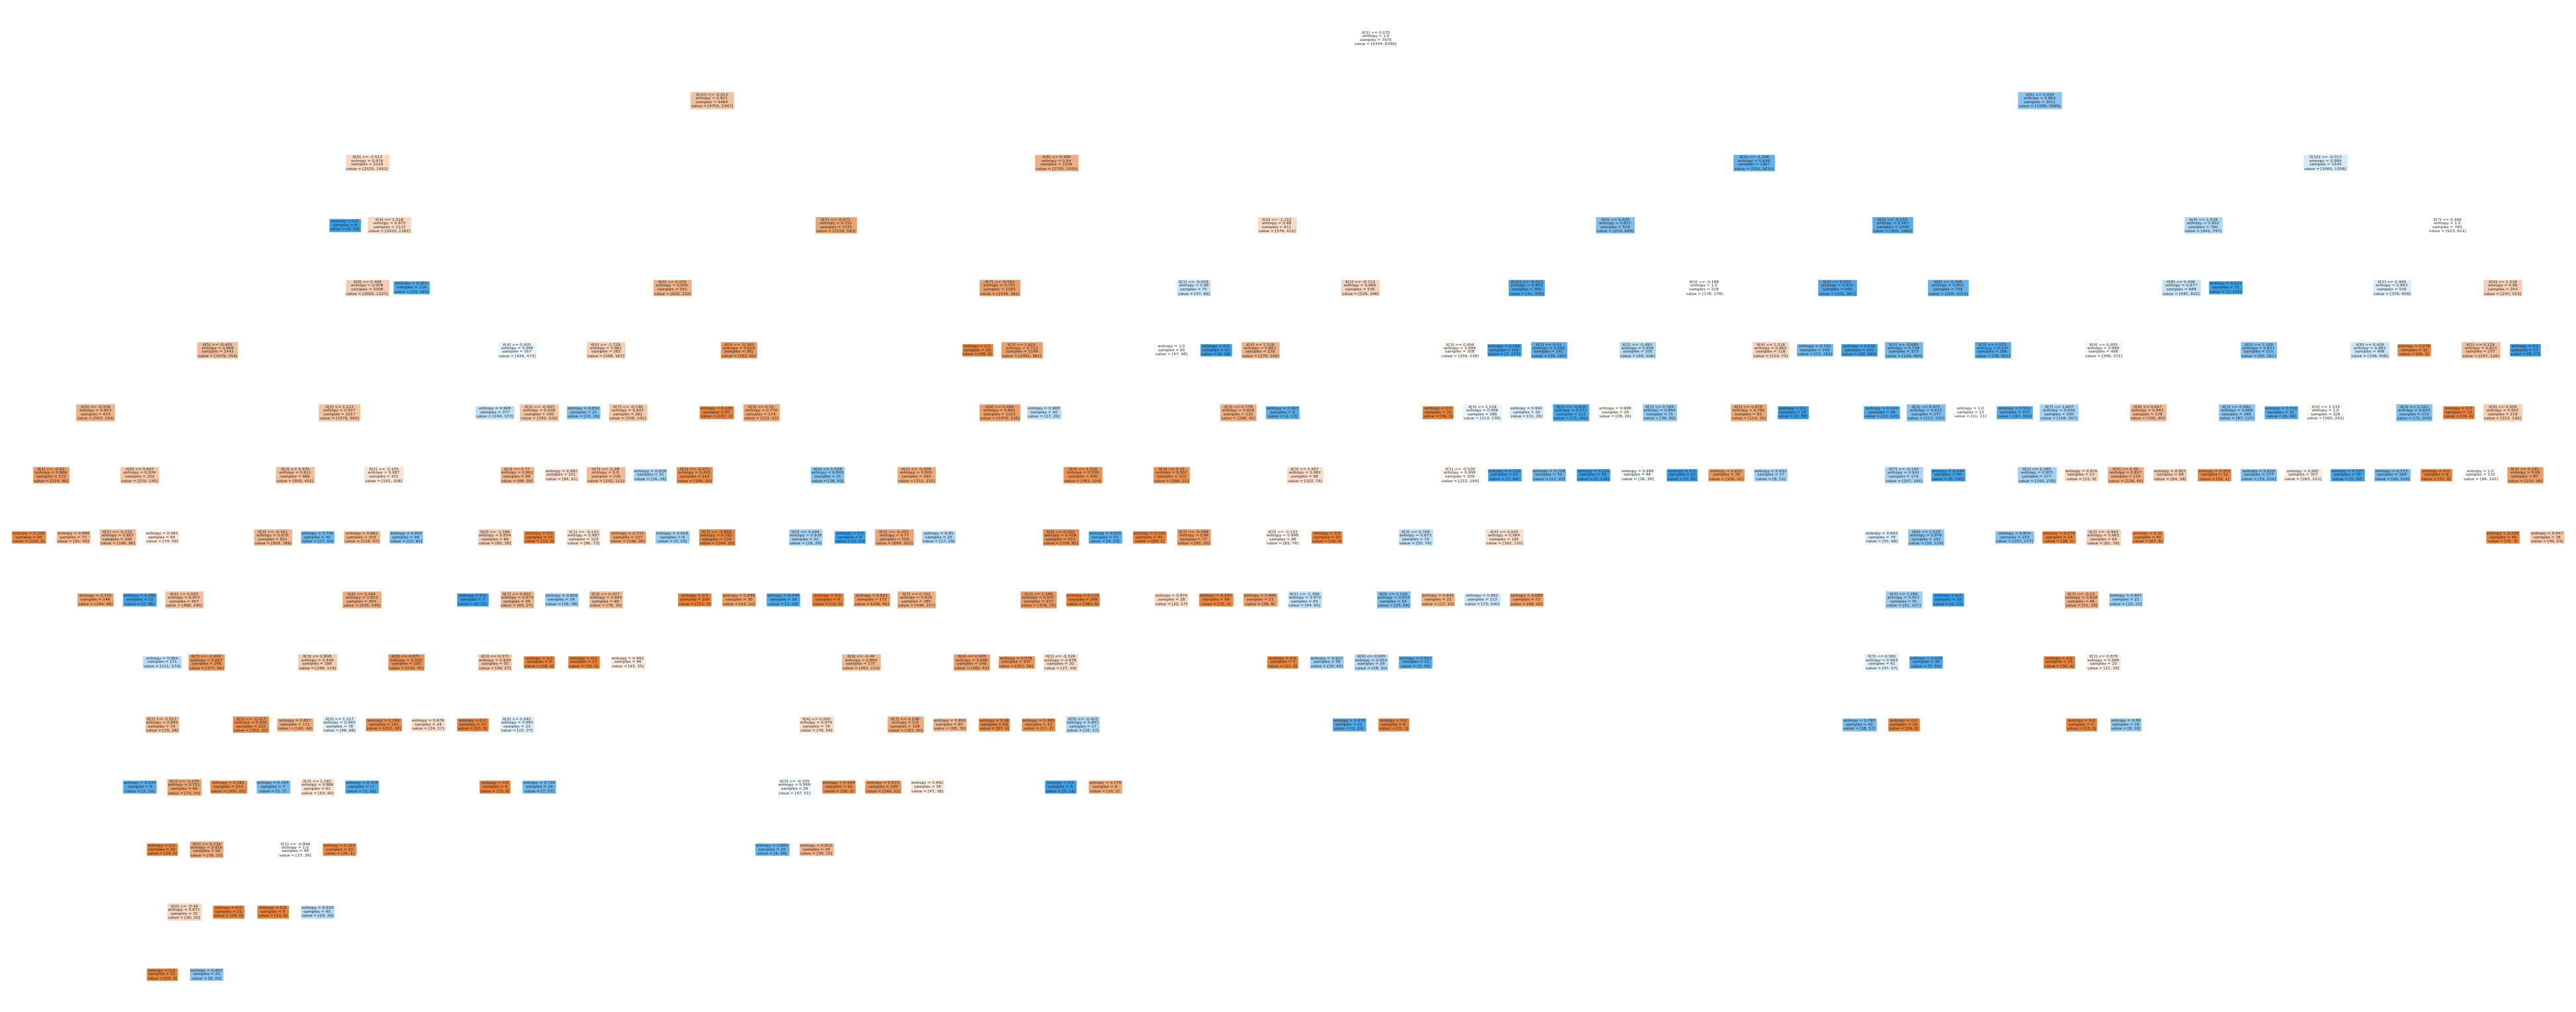

In [105]:
from sklearn import tree

plt.figure(figsize=(50,20))
tree.plot_tree(final_model_rf.estimators_[2],filled= True)

In [106]:
# look for the explaianbility of 2000 decision trees.
#for i in range(len(final_model_rf.estimators_)):
    #print(tree.export_text(final_model_rf.estimators_[i]))

    

##Look for the explaianability of which ever tree you wants by entering the number between 0-1999    
print(tree.export_text(final_model_rf.estimators_[1]))

|--- feature_4 <= 1.52
|   |--- feature_1 <= 0.04
|   |   |--- feature_7 <= -0.45
|   |   |   |--- feature_10 <= -0.01
|   |   |   |   |--- feature_3 <= 0.58
|   |   |   |   |   |--- feature_0 <= -0.43
|   |   |   |   |   |   |--- feature_5 <= -0.45
|   |   |   |   |   |   |   |--- feature_1 <= -0.34
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_1 >  -0.34
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_5 >  -0.45
|   |   |   |   |   |   |   |--- feature_3 <= -0.21
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_3 >  -0.21
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_0 >  -0.43
|   |   |   |   |   |   |--- feature_6 <= 0.09
|   |   |   |   |   |   |   |--- feature_8 <= 0.41
|   |   |   |   |   |   |   |   |--- feature_1 <= -0.71
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.58
|   |   |   |   |   |   |   |   |   |   |--- 

# lets concentrate on ANN

In [107]:
# Importing the libraries

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


Initialising the ANN

In [108]:
classifier=Sequential()

Adding the Input layer and the first hidden layer

In [109]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim=11))

Adding the second hidden layer

In [110]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

Adding the third hidden layer

In [111]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

Adding the output layer

In [112]:
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform',activation='sigmoid'))

In [113]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


# Compiling the ANN

In [114]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to training set

In [115]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,nb_epoch=100)

Train on 8535 samples, validate on 4205 samples
Epoch 1/100
8535/8535 [==============================] - 5s 571us/step - loss: 0.6493 - accuracy: 0.6217 - val_loss: 0.6037 - val_accuracy: 0.6866
Epoch 2/100
8535/8535 [==============================] - 3s 408us/step - loss: 0.5675 - accuracy: 0.7136 - val_loss: 0.5362 - val_accuracy: 0.7401
Epoch 3/100
8535/8535 [==============================] - 4s 503us/step - loss: 0.5182 - accuracy: 0.7443 - val_loss: 0.5059 - val_accuracy: 0.7510
Epoch 4/100
8535/8535 [==============================] - 4s 438us/step - loss: 0.5003 - accuracy: 0.7582 - val_loss: 0.4952 - val_accuracy: 0.7591
Epoch 5/100
8535/8535 [==============================] - 4s 412us/step - loss: 0.4921 - accuracy: 0.7606 - val_loss: 0.4893 - val_accuracy: 0.7598
Epoch 6/100
8535/8535 [==============================] - 4s 442us/step - loss: 0.4861 - accuracy: 0.7625 - val_loss: 0.4872 - val_accuracy: 0.7581
Epoch 7/100
8535/8535 [==============================] - 3s 403us/step

8535/8535 [==============================] - 4s 427us/step - loss: 0.4465 - accuracy: 0.7815 - val_loss: 0.4542 - val_accuracy: 0.7798
Epoch 57/100
8535/8535 [==============================] - 4s 452us/step - loss: 0.4456 - accuracy: 0.7831 - val_loss: 0.4562 - val_accuracy: 0.7795
Epoch 58/100
8535/8535 [==============================] - 3s 406us/step - loss: 0.4463 - accuracy: 0.7838 - val_loss: 0.4552 - val_accuracy: 0.7793
Epoch 59/100
8535/8535 [==============================] - 3s 404us/step - loss: 0.4459 - accuracy: 0.7828 - val_loss: 0.4564 - val_accuracy: 0.7750
Epoch 60/100
8535/8535 [==============================] - 4s 429us/step - loss: 0.4456 - accuracy: 0.7855 - val_loss: 0.4543 - val_accuracy: 0.7831
Epoch 61/100
8535/8535 [==============================] - 3s 403us/step - loss: 0.4456 - accuracy: 0.7835 - val_loss: 0.4564 - val_accuracy: 0.7738
Epoch 62/100
8535/8535 [==============================] - 3s 402us/step - loss: 0.4457 - accuracy: 0.7839 - val_loss: 0.4539 

Accuracy and validation accuracy are almost similar.

# Predicting the test set results

In [116]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# confusion matrix and the metrics

In [117]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_pred)

from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [118]:
print(c,score)

[[1301  304]
 [ 388 1193]] 0.7827997489014438


Only 78% accuracy is obtained.

# Lets do the hyper parameter tuning to get the best hyper parameters

In [119]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense,Activation,Embedding,Flatten,LeakyReLU,BatchNormalization
from keras.activations import relu, sigmoid
from keras.layers import Dropout

In [120]:
def create_model(layers,activation):
    model=Sequential()
    for i,nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
    model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
    model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model
model=KerasClassifier(build_fn=create_model, verbose=0)

In [121]:
layers=[(20,),(40,20),(20,10),(30,20),(25,20)]
activations=['sigmoid','relu']
param_grid = dict(layers= layers,activation= activations,batch_size= [128,256],epochs= [30])

grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

In [122]:
grid_result=grid.fit(X_train,y_train)

In [123]:
print(grid_result.best_score_,grid_result.best_params_)

0.7810832023620605 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': (40, 20)}


These are the best parameters

In [124]:
pred_y=grid.predict(X_test)
y_pred=(pred_y>0.5)

In [125]:
from sklearn.metrics import confusion_matrix,accuracy_score
c1=confusion_matrix(y_pred,y_test)
score=accuracy_score(y_pred,y_test)
print(c1,score)

[[1285  373]
 [ 320 1208]] 0.7824858757062146


There is a slight increase in the accuracy even after some hyper parameter tuning.

# Interpretability of the  ML models.

In [126]:
import shap

In [127]:
# Initialize JS For Plot
shap.initjs()

In [128]:
rf_explainer = shap.TreeExplainer(final_model_rf)
rf_shap_values = rf_explainer.shap_values(X_test)

* Variable importance plot.— Global Interpretability

* lists the most significant variables in descending order. The top variables contribute more to the model than the bottom ones and thus have high predictive power.

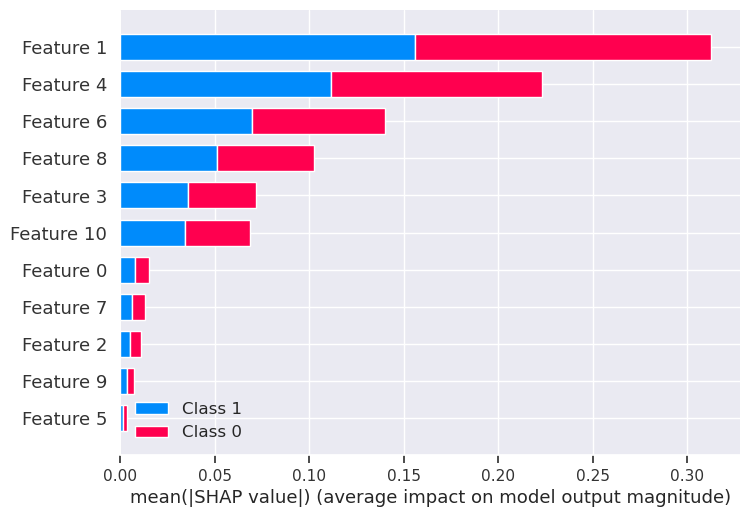

In [129]:
shap.summary_plot(rf_shap_values, X_train)

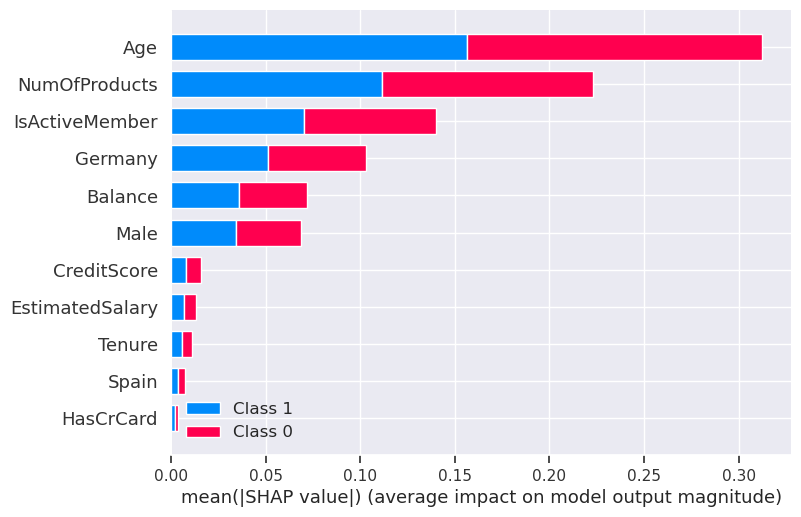

In [130]:
# summarize the effects of all the features
shap.summary_plot(rf_shap_values, X)

In [131]:
bank_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

 * The collective force plot

In [132]:
shap.force_plot(rf_explainer.expected_value[0], rf_shap_values[0], X)

# SHAP Summary Plot

The SHAP values for RF explain the margin output of the model.

This summary plot replaces the typical bar chart of feature importance. It tells which features are most important, and also their range of effects over the dataset. The color allows us match how changes in the value of a feature effect the change in risk.